**Divinng into the Extrovert vs. Introvert Personality Traits Dataset**

Understanding human personality is essential in multiple domains including mental health, education, and workplace dynamics. Machine learning techniques can be leveraged to analyze diverse behavioral parameters and predict whether an individual is an Extrovert or Introvert. This project aims to develop a predictive classification model that can assist professionals in identifying personality types for tailored communication, support systems, and decision-making.

**A rich collection of behavioral and social data designed to explore the spectrum of human personality. This dataset captures key indicators of extroversion and introversion, making it a valuable resource for psychologists, data scientists, and researchers interested in social behavior, personality prediction, and data preprocessing techniques.**

* The dataset contains 2,900 entries and 8 features, including:

* Time_spent_Alone: Average hours a person spends alone per day

* Stage_fear: Indicates if the individual has a fear of public speaking (Yes/No)

* Social_event_attendance: Number of social events attended monthly

* Going_outside: Frequency of stepping out in a week

* Drained_after_socializing: Whether the person feels exhausted after social interaction (Yes/No)

* Friends_circle_size: Approximate number of close friends

* Post_frequency: Social media posting frequency (per week)

* Personality (Target): Binary label — Introvert or Extrovert

**Importing Packages**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### **Loading the dataset**

In [39]:
data = pd.read_csv("D:\\Data Analytics\\Extrovert vs. Introvert Behavior Data\\Extrovert vs Introvert Behavior Data.csv")

**Data Preprocessing**

In [42]:
data.head()

Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert

In [44]:
print(data.shape)

(2900, 8)


In [46]:
print(list(data.columns))

['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'Personality']


In [48]:
data.describe()

Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2837.000000              2838.000000    2834.000000   
mean           4.505816                 3.963354       3.000000   
std            3.479192                 2.903827       2.247327   
min            0.000000                 0.000000       0.000000   
25%            2.000000                 2.000000       1.000000   
50%            4.000000                 3.000000       3.000000   
75%            8.000000                 6.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2823.000000     2835.000000  
mean              6.268863        3.564727  
std               4.289693        2.926582  
min               0.000000        0.000000  
25%               3.000000        1.000000  
50%               5.000000        3.000000  
75%              10.000000        6.000000  
max              15.000000       10.000000

In [50]:
data.nunique()

Time_spent_Alone             12
Stage_fear                    2
Social_event_attendance      11
Going_outside                 8
Drained_after_socializing     2
Friends_circle_size          16
Post_frequency               11
Personality                   2
dtype: int64

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


### Checking for missing values

In [55]:
# Checking for missing values
missing_values = data.isnull().sum()
missing_values

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

### Handling Missing Values

In [58]:
numerical_cols = data.select_dtypes(include=['float64']).columns
categorical_cols = data.select_dtypes(include=['object']).drop('Personality', axis=1).columns

In [60]:
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())

for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [62]:
missing_values = data.isnull().sum()
missing_values

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

### Encoding Categorical Features

In [65]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Encode Target
target_encoder = LabelEncoder()
data['Personality'] = target_encoder.fit_transform(data['Personality'])  # 0 = Extrovert, 1 = Introvert

# Save readable version
data['Personality_Label'] = data['Personality'].map({0: 'Extrovert', 1: 'Introvert'})

### Data Visualization

**distribution of personality types (Introvert vs. Extrovert)**

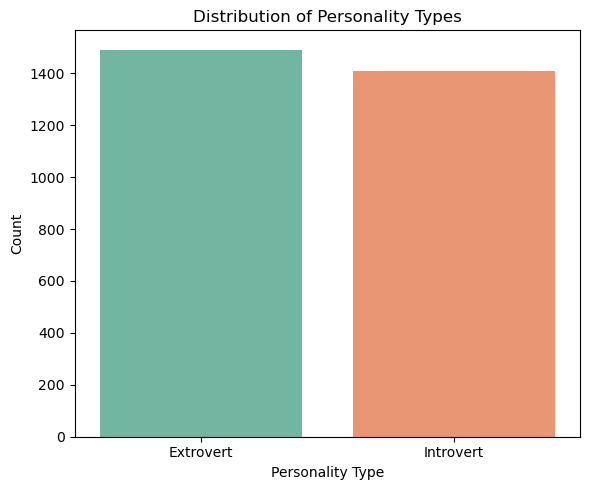

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Personality_Label'] = data['Personality'].map({0: 'Extrovert', 1: 'Introvert'})

plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='Personality_Label', hue='Personality_Label', palette='Set2', legend=False)
plt.title("Distribution of Personality Types")
plt.xlabel("Personality Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**bold text**

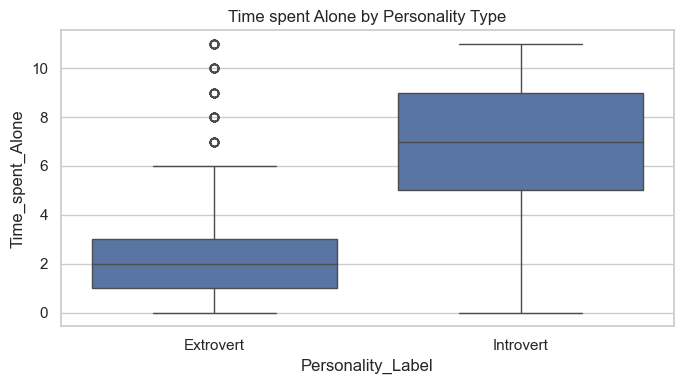

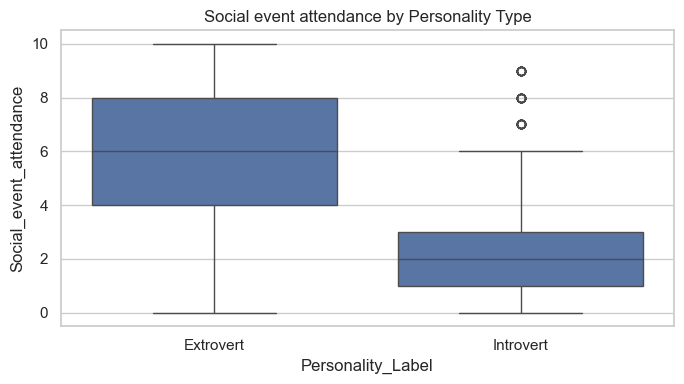

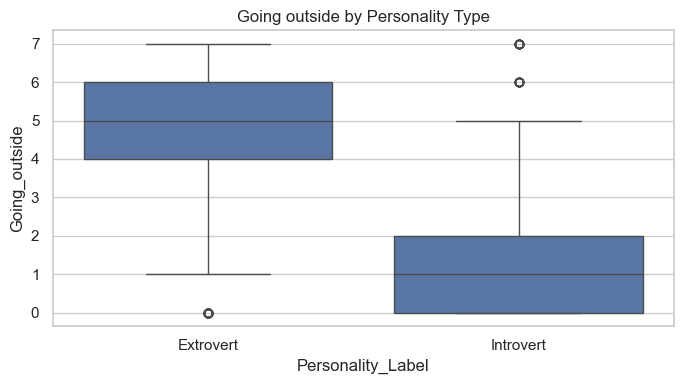

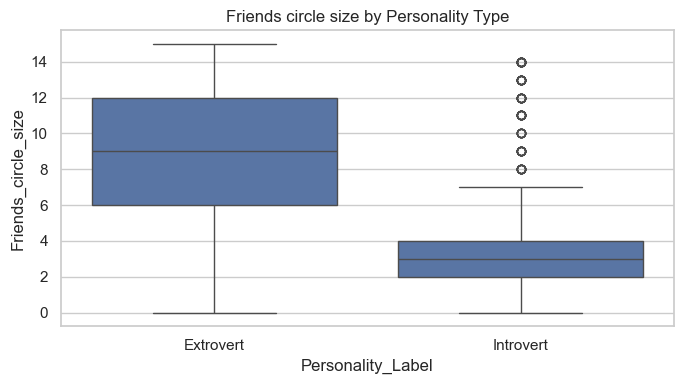

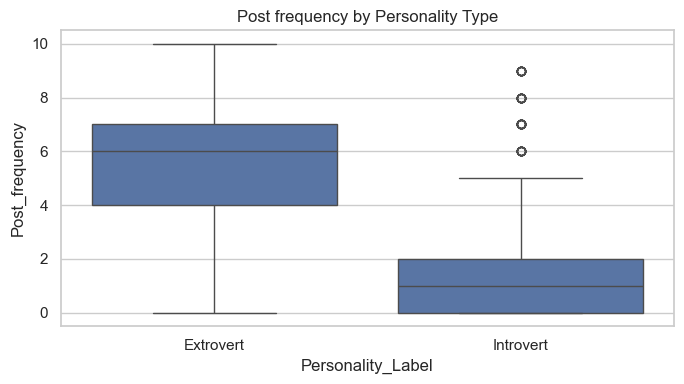

In [72]:
sns.set(style="whitegrid")
numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                  'Friends_circle_size', 'Post_frequency']

for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=data, x='Personality_Label', y=col)
    plt.title(f"{col.replace('_', ' ')} by Personality Type")
    plt.tight_layout()
    plt.show()

### Correlation Heatmap

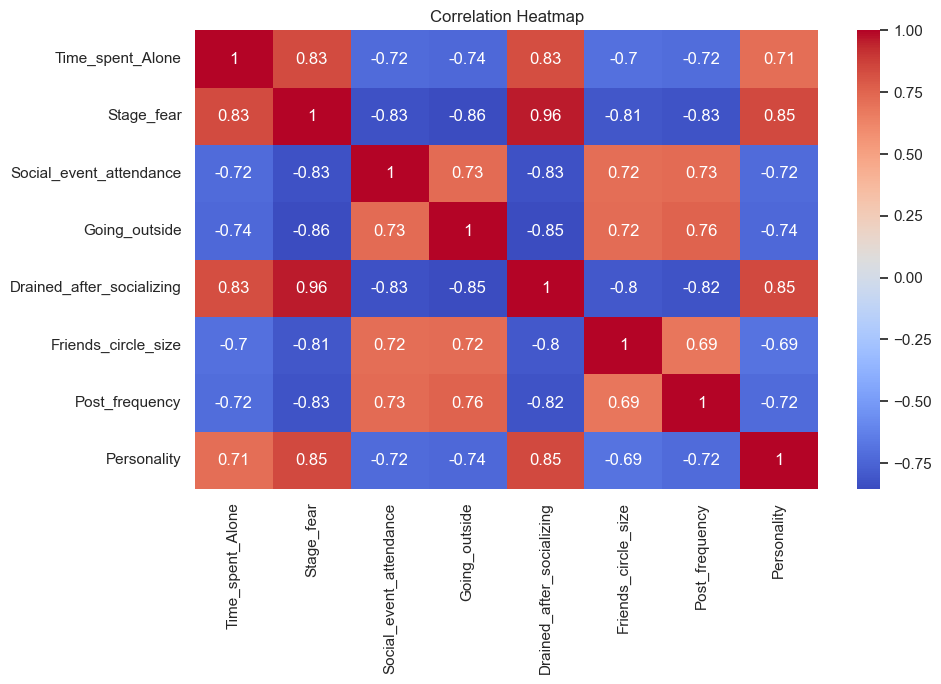

In [75]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.drop(columns=['Personality_Label']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### **Model Training**

In [78]:
X = data.drop(columns=['Personality', 'Personality_Label'])
y = data['Personality']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Initialize Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"]
    }

# Show Results
results_df = pd.DataFrame(results).T
print("\nModel Comparison Results:\n", results_df)


Model Comparison Results:
                      Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.922759   0.922753  0.922759  0.922749
Random Forest        0.910345   0.910370  0.910345  0.910314
SVM                  0.928276   0.928306  0.928276  0.928284


### **Confusion Matrix for Best Model (SVM)**

<Figure size 600x500 with 0 Axes>

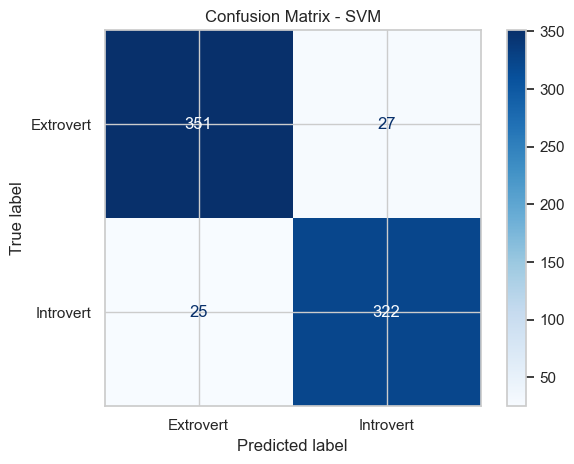

In [81]:
best_model = SVC()
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, display_labels=['Extrovert', 'Introvert'], cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.tight_layout()
plt.show()

### **Feature Importance from Random Forest**

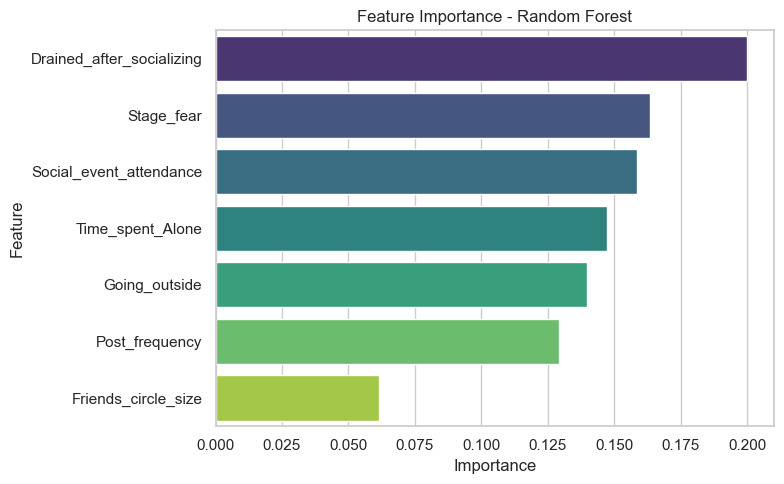

In [84]:
# Get feature importance from the trained Random Forest model
# Assuming 'models' dictionary from the previous cell is still available
rf_model = models["Random Forest"]
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=feature_importance_df,
    x='Importance',
    y='Feature',
    hue='Feature',
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

**Suggestions for Improvement & Next Steps:**

**Deploy the Model via Web App (Streamlit Example):**

In [91]:
import joblib
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# After training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = SVC()
model.fit(X_scaled, y)

# Save
joblib.dump(model, "svm_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [95]:
# streamlit_app.py
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# Load model and scaler
model = joblib.load("svm_model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("Personality Predictor")

# Input features
alone = st.slider("Time Spent Alone", 0, 10, 5)
stage_fear = st.selectbox("Stage Fear", [0, 1])
events = st.slider("Social Event Attendance", 0, 10, 5)
outside = st.slider("Going Outside", 0, 10, 5)
drained = st.selectbox("Drained After Socializing", [0, 1])
friends = st.slider("Friends Circle Size", 0, 20, 5)
posts = st.slider("Post Frequency", 0, 10, 5)

features = pd.DataFrame([[alone, stage_fear, events, outside, drained, friends, posts]],
                        columns=["Time_spent_Alone", "Stage_fear", "Social_event_attendance",
                                 "Going_outside", "Drained_after_socializing",
                                 "Friends_circle_size", "Post_frequency"])

features_scaled = scaler.transform(features)
pred = model.predict(features_scaled)[0]
label = "Extrovert" if pred == 0 else "Introvert"

st.write(f"### Predicted Personality Type: {label}")

**Applying SHAP for Model Explainability:**

**What is SHAP?**



  0%|          | 0/100 [00:00<?, ?it/s]

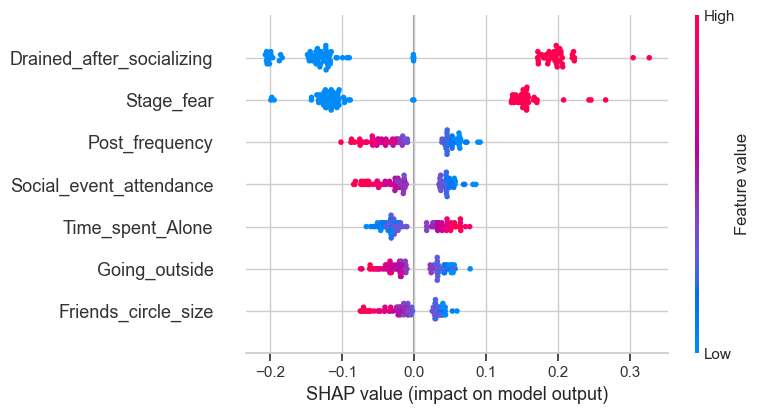

In [100]:
# SHAP Explainability
import shap
import joblib
import pandas as pd

# Load model and data
model = joblib.load("svm_model.pkl")
X_sample = pd.DataFrame(X_train[:100], columns=X.columns)

# Use KernelExplainer for non-tree models
explainer = shap.KernelExplainer(model.predict, X_sample)
shap_values = explainer.shap_values(X_sample)

# Plot summary
shap.summary_plot(shap_values, X_sample)

  0%|          | 0/100 [00:00<?, ?it/s]

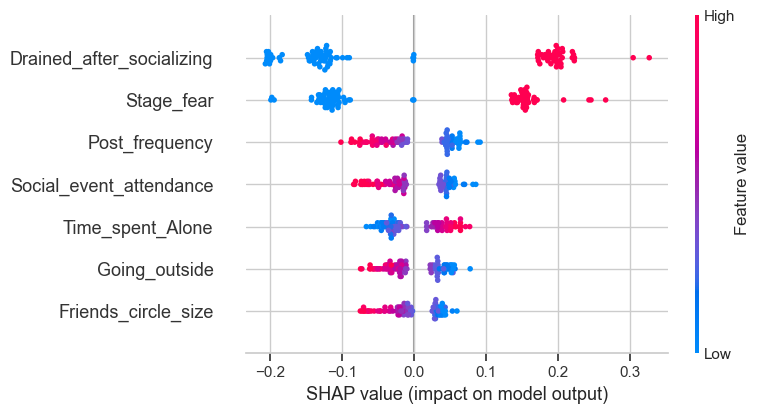

In [102]:
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load model and data
model = joblib.load("svm_model.pkl")
X_sample = pd.DataFrame(X_train[:100], columns=X.columns)

# SHAP for non-tree models (SVM here)
explainer = shap.KernelExplainer(model.predict, X_sample)
shap_values = explainer.shap_values(X_sample)

# Use matplotlib backend
shap.summary_plot(shap_values, X_sample, show=False)
plt.tight_layout()
plt.show()


## 🔍 Model Evaluation & Visual Insights
Here we add evaluation metrics and visual tools to interpret the model performance.

In [ ]:
# Confusion Matrix and Classification Report for the chosen model (e.g., SVM)
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred already exist
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## 📉 ROC Curve
Visualizing ROC curve to analyze classifier's ability to distinguish between classes.

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming the classifier supports probability prediction
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## 📊 Feature Importance with SHAP
This section explains which features influenced the predictions most.

In [ ]:
import shap
import joblib

# Sample for SHAP
X_sample = pd.DataFrame(X_train[:100], columns=X.columns)

# KernelExplainer for non-tree models
explainer = shap.KernelExplainer(model.predict, X_sample)
shap_values = explainer.shap_values(X_sample)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_sample)